## randomness

remember to use **seed**! 

### rand

generates between 0 and 1. 


### integers
`numpy.random.randint` generates **half open intervals** $[low, high)$. Therefore it's better to specify low and high.  

In [1]:
import numpy as np
np.random.rand()

0.24083000693449785

In [11]:
np.random.seed(123)     # seed123 always gives 0.69649... 
np.random.rand()


0.6964691855978616

In [10]:
np.random.rand()  # this will be different 

0.28613933495037946

In [12]:
np.random.seed(123)
coin = np.random.randint(0, 2)  # randomly generates 0 or 1
print (coin)

0


In [23]:
np.random.seed(1)
np.random.randint(low = 0, high = 2, size = 10)   # above (inclusive) 0, below 2 (non-inclusive)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [29]:
np.random.randint(low = 0, high = 2, size = 10)   # above (inclusive) 0, below 2 (non-inclusive)

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [30]:
np.random.seed(123)  # so it seems with seed123 the random number is always fixed even across computers. 
np.random.randint(low = 1, high = 7, size = 1)

array([6])

In [38]:
np.random.seed(123)
outcome = []
for x in range(5):
    coin = np.random.randint(low = 0, high = 2)   # here it's not a randomwalk (although rw requires independent increment)
    if coin == 0:
        outcome.append('heads')
    else:
        outcome.append('tails')
print (outcome)

['heads', 'tails', 'heads', 'heads', 'heads']


### construct a random walk

Roll a dice from 1 to 6: 
- 1,2: move down 1 step
- 3, 4, 5: move up 1 step
- 6: throw dice again and move up 

In [56]:
# Initialize random_walk
random_walk = [0]

for x in range(100) :
    
    step = random_walk[-1]     # Set step: last element in random_walk  
    dice = np.random.randint(1,7)  # Roll the dice

    # Determine next step
    if dice <= 2:
        step = step - 1     # if want to make sure it is above 0, use step = max(0, step-1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    # append next_step to random_walk
    random_walk.append(step)

# Print random_walk
print (random_walk)

[0, 1, 0, 1, 2, 3, 2, 1, 0, -1, -2, -3, -4, -5, -4, 1, 0, -1, 0, -1, 0, 1, 2, 3, 4, 3, 4, 3, 4, 5, 6, 7, 6, 10, 11, 10, 11, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 28, 29, 33, 34, 33, 34, 35, 34, 35, 36, 38, 39, 40, 39, 38, 39, 40, 39, 38, 39, 40, 42, 41, 40, 41, 40, 41, 42, 43, 45, 44, 45, 46, 47, 48, 49, 48, 47, 48, 47, 48, 49, 48, 51, 52, 53, 54, 53, 54, 55, 59, 58]


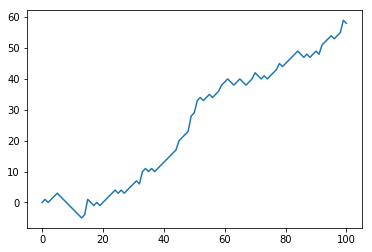

In [58]:
%matplotlib inline   # insert this before everything and the plot will appear! 
import matplotlib.pyplot as plt
plt.plot(random_walk)
plt.show()

In [71]:
final_tails = []
all_tails = []
for x in range(15):
    
    # -------------- this part does a series of 10 coin tosses (0, 1): add the values to the previous. construct rw. 
    tails = [0]    
    for x in range(10):
        coin = np.random.randint(0, 2)
        tails.append(tails[x] + coin)
        
    final_tails.append(tails[-1])   # collect only the last tail, in total 1000. 
    all_tails.append(tails)


In [73]:
np_at = np.array(all_tails)
np_at_t = np.transpose(np_at)

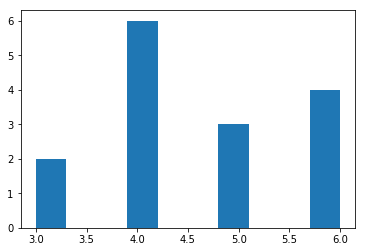

In [72]:
# plot the distribution of final walks. 
plt.hist(final_tails, bins = 10)
plt.show()

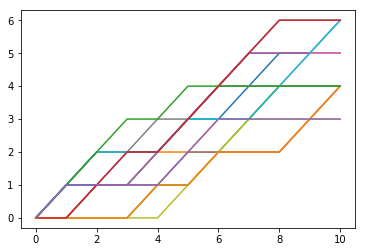

In [74]:
# plot the path of each walk
plt.plot(np_at_t) 
plt.show()

### you might also fall back to 0! 

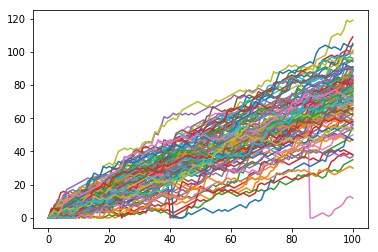

In [75]:
# Simulate random walk 100 times
all_walks = []
for i in range(100) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand() <= 0.001 :
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()